# Analiziranje planetov in lun 2. del

V tej datoteki analiziramo podatke iz spletne strani https://starwars.fandom.com/wiki/List_of_planets. V analizi nastopa 2210 primerkov (planetov in lun), za katere ločimo 5 kategorij (ime, regija, sektor,sistem, prebivalstvo):

In [2]:
import os
import pandas as pd

podatki_obdelani = 'CSV datoteke'
csv_2 = 'planeti-lune-2.csv'
pd.set_option("display.max_rows", 12) # Št. vrstic


path_2 = os.path.join(podatki_obdelani, csv_2)
planeti2 = pd.read_csv(path_2)
planeti2.index += 1

## 1. Osnovne informacije

### 1.1 Tabela podatkov

In [8]:
planeti2

,Ime,Regija,Sektor,Sistem,Prebivalstvo
1,5251977,Unknown,Unknown,Unknown,Unknown
2,Aaloth,Outer Rim Territories,Gaulus sector,Unknown,Twi'leks
3,Aargonar,Unknown,Unknown,Unknown,Humans
4,Ab Dalis,Outer Rim Territories,Unknown,Ab Dalis system,Unknown
5,Abafar,Outer Rim Territories,Sprizen sector,Abafar system,Various
...,...,...,...,...,...
2206,Zolan,Mid Rim Territories,Lambda sector,Unknown,Clawdites
2207,Zoph,Outer Rim Territories,Unknown,Unknown,Unknown
2208,Zygerria,Outer Rim Territories,Chorlian sector,Zygerria system,Zygerrians
2209,Zyzar,Unknown,Unknown,Unknown,Unknown


Opazimo lahko, da je mnogo podatkov predstavljenih kot 'Unknown' in ravno to dejstvo bomo uporabili v nadaljnji analizi.

## 2. Tabele

### 2.1 Pogostost začenic

Ponovno nas zanima katere začetnice prevladujejo. Ali lahko pričakjemo podobne rezultate?

In [15]:
zacetnice_ponovitve = {}
for i in "ABCDEFGHIJKLMNOPRSTUVWXYZ": # Zadošča angleška abeceda (imen planetov ne slovenimo)
    zacetnice_ponovitve[i] = 0
    for j in planeti2['Ime']:
        if i == j[0]:
            zacetnice_ponovitve[i] += 1
            
zacetnice = {'začetnice':list(zacetnice_ponovitve.keys()), 'ponovitve':list(zacetnice_ponovitve.values())}
zacetnice_pd = pd.DataFrame.from_dict(zacetnice)
zacetnice_pd = zacetnice_pd.set_index(['začetnice'])

In [10]:
# Izpis tabele
zacetnice_pd

,ponovitve
začetnice,
A,164
B,110
C,142
D,92
E,58
...,...
V,80
W,28
X,12


Ponovno z naskokom preladujejo planeti in lune z začetnico A.

### 2.2 Katera regija je najbolj zastopana?

In [38]:
def najpogostejsa_upodobitev_1(podatki):
    upodobitve = {}  # Slovar za shranjevanje števila upodobitev vsakega filma/serije

    for index, planet in podatki.iterrows():
        upodobitev = planet['Regija']

        if upodobitev in upodobitve:
            upodobitve[upodobitev] += 1
        else:
            upodobitve[upodobitev] = 1
    
    return upodobitve

upodobitve_planet2 = najpogostejsa_upodobitev_1(planeti2)

In [39]:
# Podatki za tabelo
podatki_tabela = {
    'Regija': list(upodobitve_planet2.keys()),
    'Število planetov': list(upodobitve_planet2.values())
}

# Ustvarimo tabelo iz podatkov
tabela = pd.DataFrame(podatki_tabela)

# Uredimo tabelo po padajočem vrstnem redu števila planetov
tabela = tabela.sort_values(by='Število planetov', ascending=False)

tabela

,Regija,Število planetov
1,Outer Rim Territories,776
0,Unknown,610
3,Mid Rim Territories,250
8,Inner Rim Territories,122
4,Core Worlds,104
...,...,...
13,Galactic Frontier,6
15,Western Reaches,6
10,"Outer Rim Territories,The Slice",2
12,Republic frontier,2


Kot že rečeno mnogo podatkov je 'Unknown' a še vedno prevladujejo Outer Rim Teriritories, ki jih ljubitelji poznajo predvsem iz klonskih vojn.

### 2.3 Kateri sektor je najbolj zastopan?

Gre za podobno analizo kot zgoraj, s ključno razliko in sicer, da več sektorjev sestavlja regijo:

In [43]:
def najpogostejsa_upodobitev(podatki):
    upodobitve = {}  # Slovar za shranjevanje števila upodobitev vsakega filma/serije

    for index, planet in podatki.iterrows():
        upodobitev = planet['Sektor']

        if upodobitev in upodobitve:
            upodobitve[upodobitev] += 1
        else:
            upodobitve[upodobitev] = 1
    
    return upodobitve

upodobitve_planet2 = najpogostejsa_upodobitev(planeti2)

In [41]:
# Podatki za tabelo
podatki_tabela = {
    'Sektor': list(upodobitve_planet2.keys()),
    'Število planetov': list(upodobitve_planet2.values())
}

# Ustvarimo tabelo iz podatkov
tabela = pd.DataFrame(podatki_tabela)

# Uredimo tabelo po padajočem vrstnem redu števila planetov
tabela = tabela.sort_values(by='Število planetov', ascending=False)

tabela

,Sektor,Število planetov
0,Unknown,1712
10,Anoat sector,60
13,Albarrio sector,14
34,Savareen sector,12
26,Chommell sector,12
...,...,...
58,Rocantor sector,2
57,Tynquay sector,2
56,Tammuz sector,2
55,Shadola sector,2


Pomankljivost podatkov o sektorjih naredi to analizo precej nesmieleno, zato bi bilo tudi analizranje podenot regij (tj. sistemov), brez smisla.

### 2.4 Prebivalstvo

Ugotovili bi radi za koliko planeov in lun ima prebivalstvo oz. bolj natančno katere prebivalce poznamo.

Opomba: Brez škode za splošnost in v korist analize bomo predpostavili, da so planeti, za ketere nimamo podatkov, nenaseljeni.

In [8]:
# Izberemo samo planete, katerih prebivalstvo ni 'Unknown'
planeti_z_znanim_prebivalstvom = planeti2[planeti2['Prebivalstvo'] != 'Unknown']

# Ustvarimo tabelo 
tabela_planetov = planeti_z_znanim_prebivalstvom[['Ime', 'Prebivalstvo']]

# Izpis tabele
tabela_planetov


,Ime,Prebivalstvo
2,Aaloth,Twi'leks
3,Aargonar,Humans
5,Abafar,Various
6,Abednedo,Abednedo
12,Aeos Prime,Aeosians
...,...,...
2201,Zav Alox,Aloxian
2202,Zeffo,Zeffonian
2204,Zhanox,Ugnaughts
2206,Zolan,Clawdites


### 2.5 Koliko planetov in lun je poseljenih?

Zdaj, ko smo izvedeli kateri planeti so poseljeni nas zanima koliko je takih:

In [12]:
# Preštejemo poseljene in neposeljene planete
stevilo_poseljenih = len(tabela_planetov)
stevilo_neposeljenih = len(planeti2[planeti2['Prebivalstvo'] == 'Unknown'])

# Ustvarimo tabelo
tabela_poseljenost = pd.DataFrame({
    'Stanje': ['Poseljeni', 'Neposeljeni'],
    'Število planetov': [stevilo_poseljenih, stevilo_neposeljenih]
})

# Izpišemo tabelo
tabela_poseljenost



,Stanje,Število planetov
0,Poseljeni,870
1,Neposeljeni,1340


## 3. Grafi in diagrami

In [13]:
import matplotlib.pyplot as plt

V tem razdelku zgornje rezultate predstavimo še grafično:

### 3.1 Pogostost začetnic

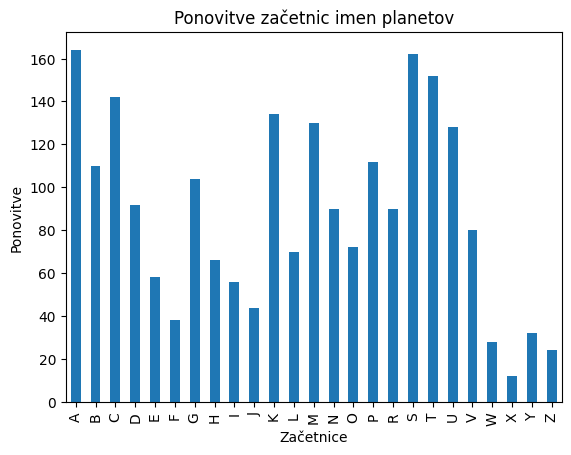

In [16]:
zacetnice_pd.plot(kind='bar', legend=False)
plt.xlabel('Začetnice')
plt.ylabel('Ponovitve')
plt.title('Ponovitve začetnic imen planetov')
plt.show()

### 3.2 Katera regija je najbolj zastopana?

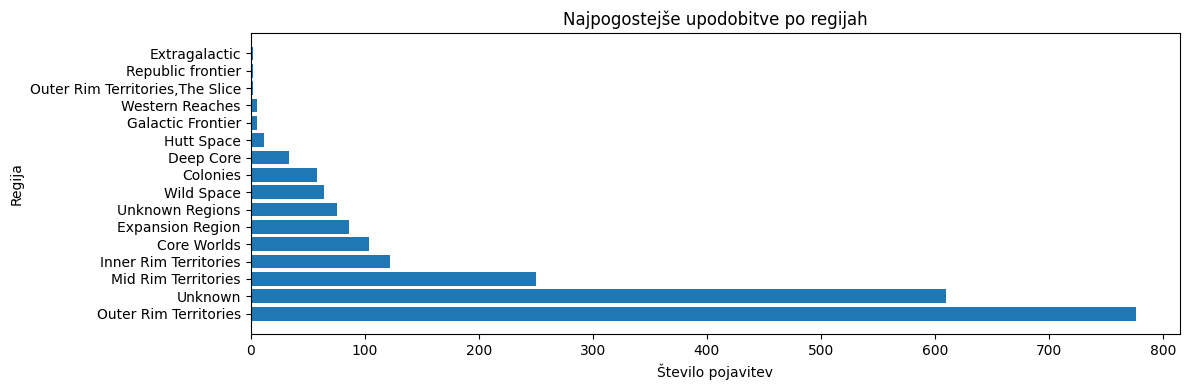

In [42]:
upodobitve_planet2 = najpogostejsa_upodobitev_1(planeti2)

# Pretvorimo slovar v DataFrame
upodobitve_df = pd.DataFrame.from_dict(upodobitve_planet2, orient='index', columns=['Število pojavitev'])

# Sortiramo po številu pojavitev
upodobitve_df = upodobitve_df.sort_values(by='Število pojavitev', ascending=False)

# Narišemo stolpični diagram
plt.figure(figsize=(12, 4))
plt.barh(upodobitve_df.index, upodobitve_df['Število pojavitev'])
plt.xlabel('Število pojavitev')
plt.ylabel('Regija')
plt.title('Najpogostejše upodobitve po regijah')
plt.tight_layout()
plt.show()


### 3.3 Kateri sektor je najbolj zastopan?

Še grafični prikaz (morda boljši pokazatelj) pomankanja konkretnega podatka:

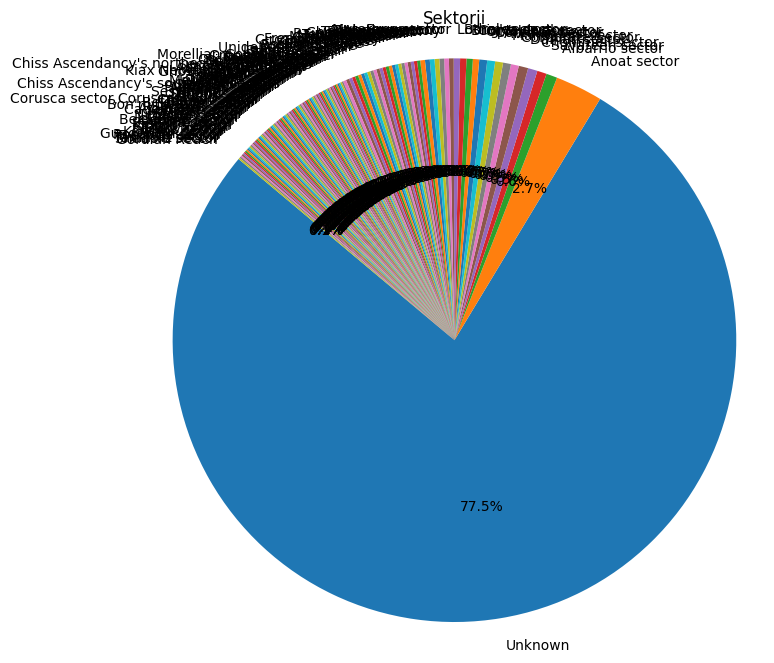

In [45]:
upodobitve_planet2 = najpogostejsa_upodobitev(planeti2)

# Pretvorimo slovar v DataFrame
upodobitve_df = pd.DataFrame.from_dict(upodobitve_planet2, orient='index', columns=['Število pojavitev'])

# Sortiramo po številu pojavitev
upodobitve_df = upodobitve_df.sort_values(by='Število pojavitev', ascending=False)

# Narišemo tortni diagram
plt.figure(figsize=(8, 8))
plt.pie(upodobitve_df['Število pojavitev'], labels=upodobitve_df.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Zagotovi, da je diagram kroga
plt.title('Sektorji')
plt.show()


Kar 77,5% kategoriziramo kot unknown.

### 3.4 Prebivalstvo

Imena prebivalsta predstavimo malo drugače:

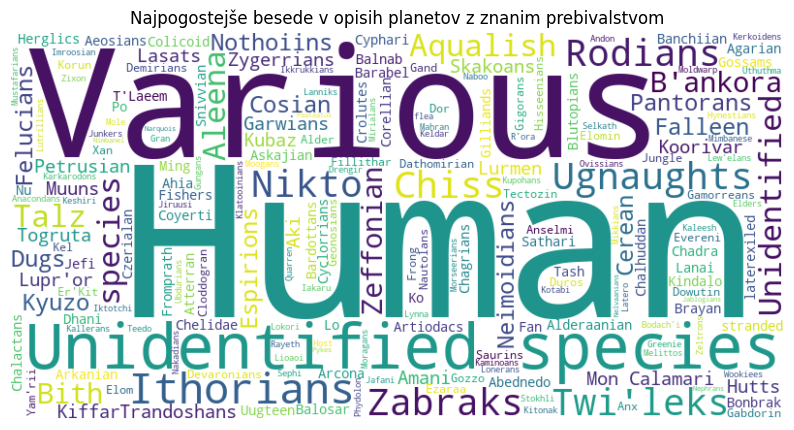

In [51]:
from wordcloud import WordCloud

opisi_planet = ' '.join(planeti_z_znanim_prebivalstvom['Prebivalstvo'].dropna())

# Ustvarimo oblačni graf
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(opisi_planet)

# Prikaz 
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Najpogostejše besede v opisih planetov z znanim prebivalstvom')
plt.show()


### 3.5 Koliko planetov in lun je poseljenih?

Zanima nas torej podatek v %:

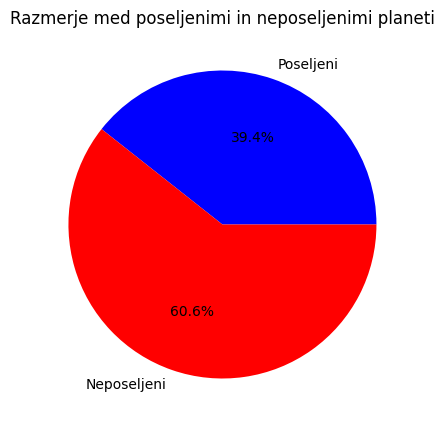

In [55]:
statusi = ['Poseljeni', 'Neposeljeni']
stevila = [stevilo_poseljenih, stevilo_neposeljenih]

# Narišemo tortni diagram
plt.figure(figsize=(5, 5))
plt.pie(stevila, labels=statusi, autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Razmerje med poseljenimi in neposeljenimi planeti')
plt.show()

S tem se zaključuje še druga analiza podatkov. Prvo si lahko ogledate v Analiza1.ipynb. Sledi še analiza skupnih podatkov, ki čaka v datoteki Analiza-skupaj.ipynb